In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer
from datetime import datetime
pd.options.mode.chained_assignment = None

plt.style.use("ggplot")

In [123]:
df = pd.read_csv(r"./datasets/disney-characters.csv")
df = df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x)
df.head()

,index,movie_title,release_date,hero,villian,song
0,0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,2,Fantasia,"November 13, 1940",NaN,Chernabog,NaN
3,3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,4,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


In [124]:
for column in df.columns:
    print(f"Неуникальных в {column}: {len(df[column]) - len(df[column].unique())}")

Неуникальных в index: 0
Неуникальных в movie_title: 0
Неуникальных в release_date: 0
Неуникальных в hero: 6
Неуникальных в villian: 9
Неуникальных в song: 9


In [125]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data.loc[missing_data['Total'] != 0]
    missing_data.index.name = 'Column'
    return missing_data



draw_missing(df)

,Total,Percent
Column,,
villian,10,17.857143
song,9,16.071429
hero,4,7.142857


In [126]:
def convert_to_datetime(date_string = str):
    date_format = "%B %d, %Y"
    return datetime.strptime(str(date_string), date_format)

In [127]:
df['release_date'] = df['release_date'].apply(convert_to_datetime)

In [128]:
def plot_class(category_column):
    plt.figure(figsize=(8, 4))
    df[category_column].value_counts().plot.bar()
    if len(category_column) < 10:
        plt.title(category_column)
    plt.xlabel(category_column)
    plt.ylabel('Counts')
    plt.show()

In [129]:
def most_frequent(column):

    value_counts = df[column].value_counts(normalize=True)

    probabilities = np.array(value_counts.values)
    values = np.array(value_counts.index)

    new_values = np.random.choice(values, size=df[column].isnull().sum(), p=probabilities)
    df.loc[df[column].isnull(), column] = new_values

    return df

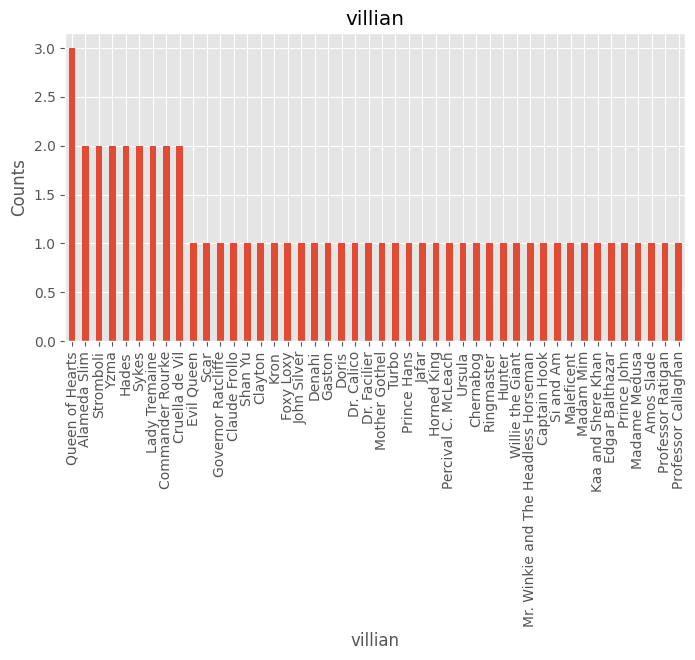

In [130]:
df = most_frequent("villian")
plot_class("villian")

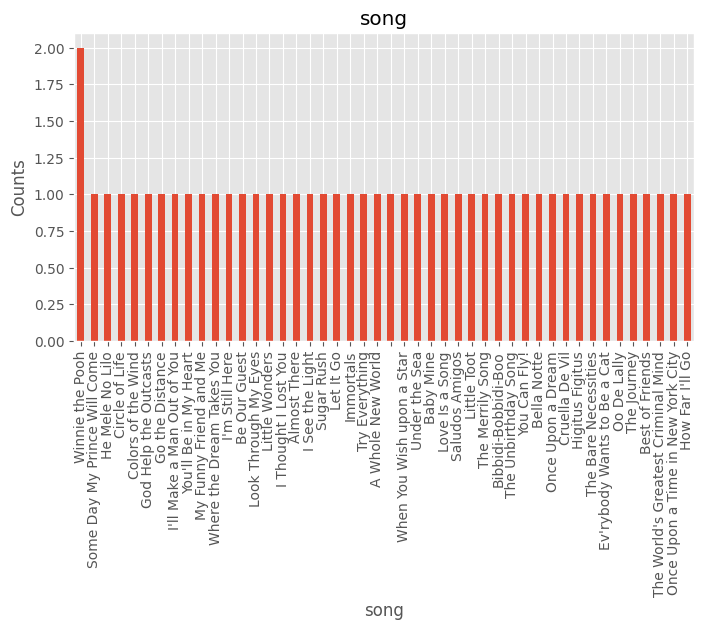

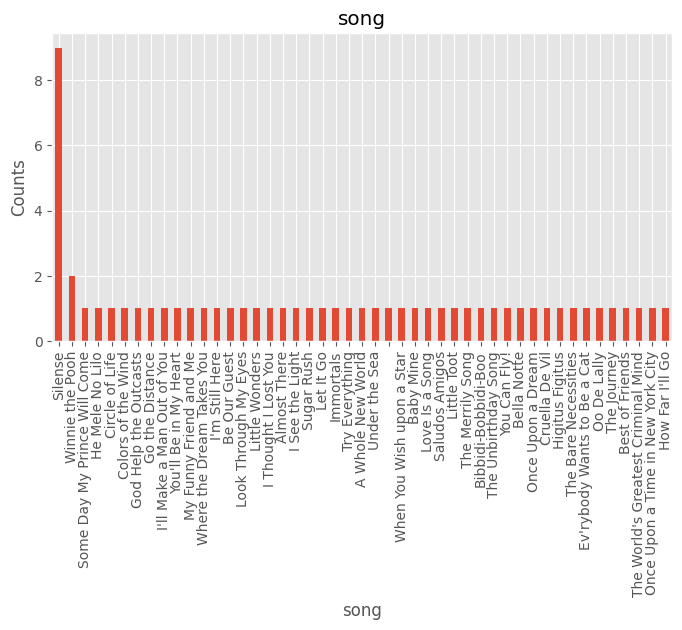

In [131]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Silense')
plot_class("song")
df[["song"]] = imp.fit_transform(df[["song"]])
df[["hero"]] = imp.fit_transform(df[["hero"]])
plot_class("song")

In [132]:
le = LabelEncoder()
df["villian"] = le.fit_transform(df["villian"])
df["hero"] = le.fit_transform(df["hero"])

In [133]:
oe = OrdinalEncoder()
df[["movie_title"]] = oe.fit_transform(df[["movie_title"]]).astype(int)

In [134]:
print(df.dtypes)
draw_missing(df)

index                    int64
movie_title              int32
release_date    datetime64[ns]
hero                     int32
villian                  int32
song                    object
dtype: object


,Total,Percent
Column,,


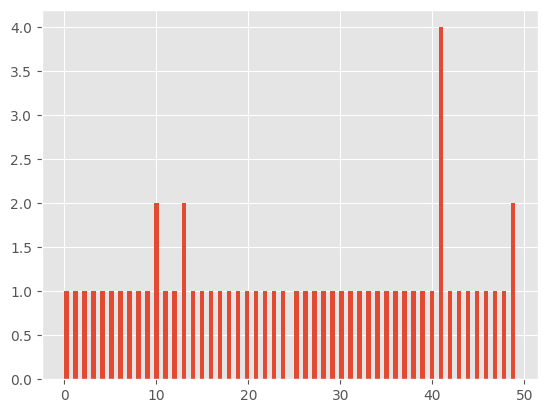

In [135]:
plt.hist(df["hero"], 100);

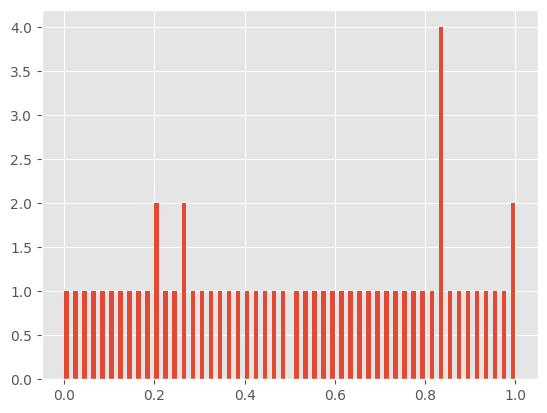

In [136]:
df[["hero"]] = MinMaxScaler().fit_transform(df[["hero"]])
plt.hist(df["hero"], 100);
df[["hero"]] = StandardScaler().fit_transform(df[["hero"]])

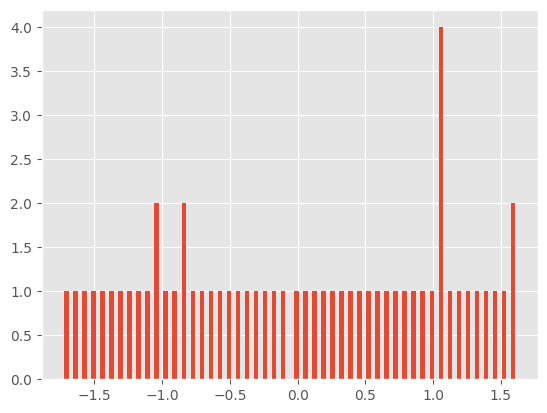

In [137]:
plt.hist(df["hero"], 100);